DADOS EM https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from datetime import datetime, date

In [26]:
cd= pd.read_csv(r'C:\Users\llcor\OneDrive\Área de Trabalho\DadosKaggle\credit_card_transactions.csv')
cd.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


CONHECENDO O DATASET

In [27]:
cd.shape

(1296675, 24)

- Verifica-se que o dataset tem 1.296.675 linhas
- São 24 colunas, com variáves que contêm informações sobre as transações, dados dos titulares do cartão, do comério, etc. 

In [28]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

#### Tratamento dos dados

- para facilitar a compreensão e o tratamento dos dados, vou iniciar por traduzir as colunas

In [29]:
cd.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [30]:
cd =cd.rename(columns={'Unnamed: 0' : 'id', 
                        'trans_date_trans_time' : 'data_hr_trans', 
                        'cc_num':'num_cartao', 
                        'merchant':'comercio', 
                        'category':'categoria',
                        'amt': 'valor_trans', 
                        'first':'primeiro_nome', 
                        'last':'ultimo_nome', 
                        'gender':'genero', 
                        'street':'endereco', 
                        'city':'cidade', 
                        'state':'estado', 
                        'zip':'cep',
                        'lat':'lat', 
                        'long':'long', 
                        'city_pop':'populacao_cidade', 
                        'job':'ocupacao_titular', 
                        'dob' :'data_nasc', 
                        'trans_num':'num_trans', 
                        'unix_time':'id_data_hr_trans',
                        'merch_lat':'lat_comercio', 
                        'merch_long':'long_comercio', 
                        'is_fraud':'indicador_fraude', 
                        'merch_zipcode':'cep_comercio'})


In [31]:
cd.head()

,id,data_hr_trans,num_cartao,comercio,categoria,valor_trans,primeiro_nome,ultimo_nome,genero,endereco,...,long,populacao_cidade,ocupacao_titular,data_nasc,num_trans,id_data_hr_trans,lat_comercio,long_comercio,indicador_fraude,cep_comercio
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [32]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1296675 non-null  int64  
 1   data_hr_trans     1296675 non-null  object 
 2   num_cartao        1296675 non-null  int64  
 3   comercio          1296675 non-null  object 
 4   categoria         1296675 non-null  object 
 5   valor_trans       1296675 non-null  float64
 6   primeiro_nome     1296675 non-null  object 
 7   ultimo_nome       1296675 non-null  object 
 8   genero            1296675 non-null  object 
 9   endereco          1296675 non-null  object 
 10  cidade            1296675 non-null  object 
 11  estado            1296675 non-null  object 
 12  cep               1296675 non-null  int64  
 13  lat               1296675 non-null  float64
 14  long              1296675 non-null  float64
 15  populacao_cidade  1296675 non-null  int64  
 16  

- Variáveis numéricas: id, num_cartao, valor_trans, cep, lat, long, populacao_cidade, id_data_hr_trans, lat_comercio, long_comercio, indicador_fraude, cep_comercio
- Variáveis categóricas: data_hr_trans...

Verifiquei que variáveis como id, num_cartao, cep, cep, lat, long,  id_data_hr_trans, lat_comercio, long_comercio, indicador_fraude, cep_comercio, identificadas pelo python como númericas deverão ser transformadas em categóricas a depender das análises 

VALORES AUSENTES - MISSING VALUES

In [33]:
valores_aus = (cd.isna().sum()) 
valores_aus

id                       0
data_hr_trans            0
num_cartao               0
comercio                 0
categoria                0
valor_trans              0
primeiro_nome            0
ultimo_nome              0
genero                   0
endereco                 0
cidade                   0
estado                   0
cep                      0
lat                      0
long                     0
populacao_cidade         0
ocupacao_titular         0
data_nasc                0
num_trans                0
id_data_hr_trans         0
lat_comercio             0
long_comercio            0
indicador_fraude         0
cep_comercio        195973
dtype: int64

In [34]:
valores_ausentes_perc = valores_aus[valores_aus>0]/cd.shape[0]
print(f'{valores_ausentes_perc * 100} %')

cep_comercio    15.113502
dtype: float64 %


- A única variável que tem valores ausentes é o CEP (195.973 valores ausentes). O que não deve atrapalhar nas análises. 

VALORES DUPLICADOS 

In [35]:
cd.duplicated().sum()

0

- Nenhum valor duplicado foi identificado 

TRATANDO DADOS DATETIME
- foi verificado que as váriáveis de data e hora estavam em formatos não adequados, por isso, decidi transforma-las em tipo datetime

In [36]:
cd['data_hr_trans'] = pd.to_datetime(cd['data_hr_trans'], errors='coerce')
cd['data_nasc'] = pd.to_datetime(cd['data_nasc'], errors='coerce')

In [37]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1296675 non-null  int64         
 1   data_hr_trans     1296675 non-null  datetime64[ns]
 2   num_cartao        1296675 non-null  int64         
 3   comercio          1296675 non-null  object        
 4   categoria         1296675 non-null  object        
 5   valor_trans       1296675 non-null  float64       
 6   primeiro_nome     1296675 non-null  object        
 7   ultimo_nome       1296675 non-null  object        
 8   genero            1296675 non-null  object        
 9   endereco          1296675 non-null  object        
 10  cidade            1296675 non-null  object        
 11  estado            1296675 non-null  object        
 12  cep               1296675 non-null  int64         
 13  lat               1296675 non-null  float6

- me chamou a atenção a quantidade de transações no inicio em Janeiro, então decidi investigar

In [38]:
cd['ano_trans'] = cd['data_hr_trans'].dt.year
cd['mes_trans'] = cd['data_hr_trans'].dt.strftime('%m')
cd['dia_trans'] = cd['data_hr_trans'].dt.strftime('%d')
cd['dia_mes_trans'] = cd['mes_trans'] + '-' + cd['mes_trans']

In [39]:
contagem = cd['dia_mes_trans'].value_counts()

<Axes: xlabel='dia_mes_trans'>

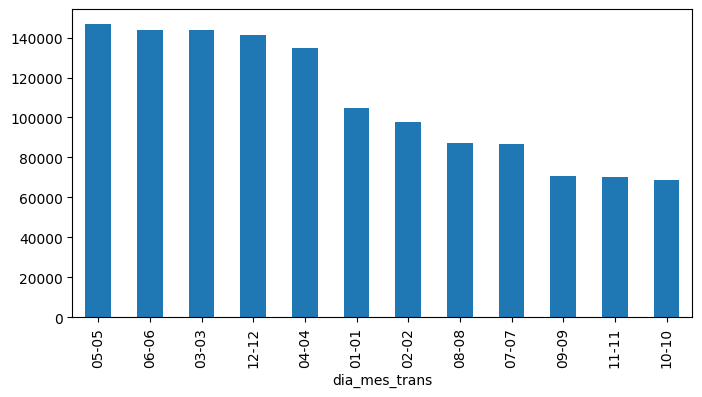

In [40]:
plt.figure(figsize=(8, 4))
contagem.plot(kind='bar')

- apesar de uma grande quantidade de transações no dia 1, ele não é o dia com mais transações 

Criando e analisando informações sobre idade

In [41]:
cd['idade'] = cd['data_hr_trans'].dt.year - cd['data_nasc'].dt.year 
cd['idade'].unique()

array([31, 41, 57, 52, 33, 58, 26, 72, 78, 45, 29, 53, 30, 74, 54, 67, 81,
       73, 39, 48, 55, 42, 49, 35, 21, 32, 77, 47, 59, 65, 25, 43, 38, 93,
       83, 22, 64, 36, 40, 19, 62, 37, 84, 44, 24, 92, 91, 69, 61, 68, 34,
       18, 90, 56, 71, 51, 46, 60, 20, 16, 50, 88, 79, 85, 27, 80, 66, 63,
       15, 14, 82, 86, 23, 75, 28, 70, 76, 89, 87, 95, 94, 96, 17])

In [42]:
bins = [0,20,30,40,50,60,100]
labels = ['0-20','20-30', '30-40', '40-50', '50-60', '60+']
cd['faixa_id'] = pd.cut(x=cd['idade'], bins=bins, labels=labels, right=True)


c:\Users\llcor\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\llcor\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='count', ylabel='faixa_id'>

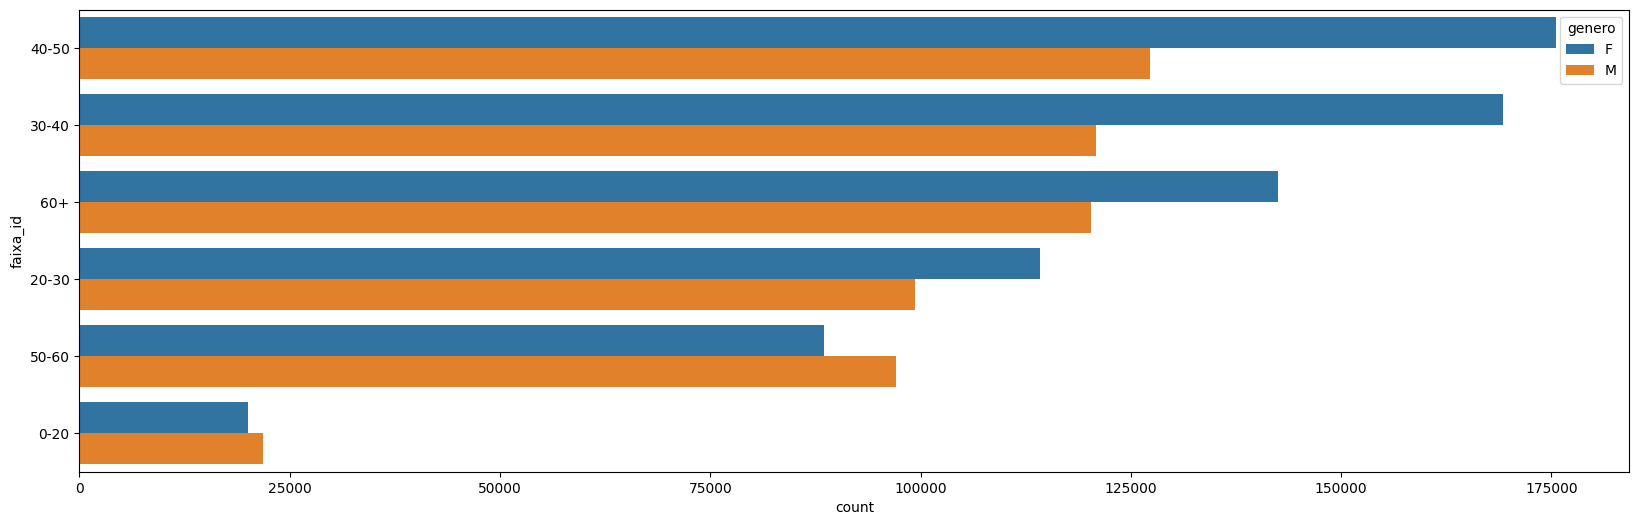

In [43]:
plt.figure(figsize=(20,6))
sea.countplot(cd, y='faixa_id', order = cd['faixa_id'].value_counts().index, hue ='genero')

- a maior parte das transações foram realizadas por pessoas na faixa etária de 30 a 40 e 40 a 50
- hommens entre 0 e 20 anos e 50 e 60 anos realizaram mais transações do que mulheres 

<Axes: xlabel='categoria', ylabel='count'>

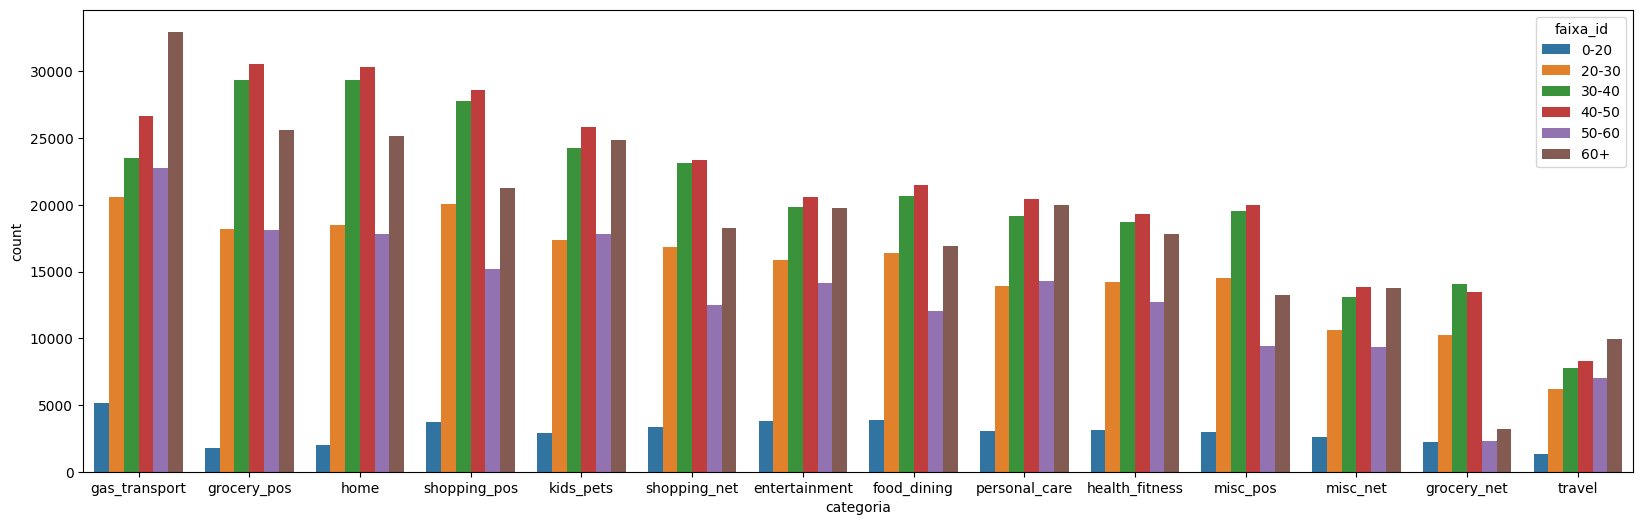

In [44]:
plt.figure(figsize=(20,6))
sea.countplot(cd, x='categoria', order=cd['categoria'].value_counts().index, hue='faixa_id')